In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r"data\winequality-white.csv", sep = ";")

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data["quality"].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [7]:
def quality(x):
    if x <= 5:
        x = 0

    elif x == 6:
        x = 1

    else:
        x = 2

    return x

In [8]:
data["quality"].apply(quality).value_counts()

quality
1    2198
0    1640
2    1060
Name: count, dtype: int64

Making the categories based on: 
- if rating is <=5, wine is poor quality
- if rating is =6, wine is average quality
- if rating > 6, wine is good quality

In [9]:
y_labels = data["quality"].apply(quality)

In [10]:
y_labels

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    2
4897    1
Name: quality, Length: 4898, dtype: int64

In [11]:
X = data.drop("quality", axis = 1)

In [12]:
X_arr = data.drop("quality", axis = 1).to_numpy()

In [13]:
y_arr = y_labels.to_numpy()

# Splitting into Train Test Validation

In [14]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_arr)

test_size = int(total_size * test_ratio)
validation_size = int(total_size*validation_ratio)
train_size = total_size - validation_size - test_size

In [15]:
import numpy as np

In [16]:
np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

In [17]:
rnd_indices

array([4656, 3659,  907, ..., 3092, 3772,  860],
      shape=(4898,), dtype=int32)

In [18]:
X_train = X_arr[rnd_indices[:train_size]]
y_train = y_arr[rnd_indices[:train_size]]

X_valid = X_arr[rnd_indices[train_size:-test_size]]
y_valid = y_arr[rnd_indices[train_size:-test_size]]

X_test = X_arr[rnd_indices[-test_size:]]
y_test = y_arr[rnd_indices[-test_size:]]

# EDA

In [19]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [20]:
X_train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000


In [35]:
y_train_df = pd.Series(y_train, name = "quality")

In [22]:
import matplotlib.pyplot as plt

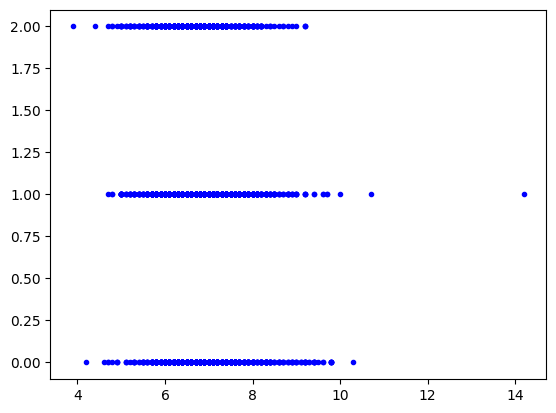

In [36]:
plt.plot(X_train_df["fixed acidity"], y_train_df, "b.")

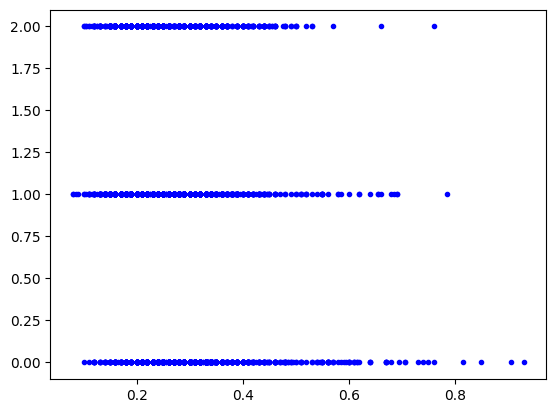

In [37]:
plt.plot(X_train_df["volatile acidity"], y_train_df, "b.")

In [25]:
import seaborn as sns

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

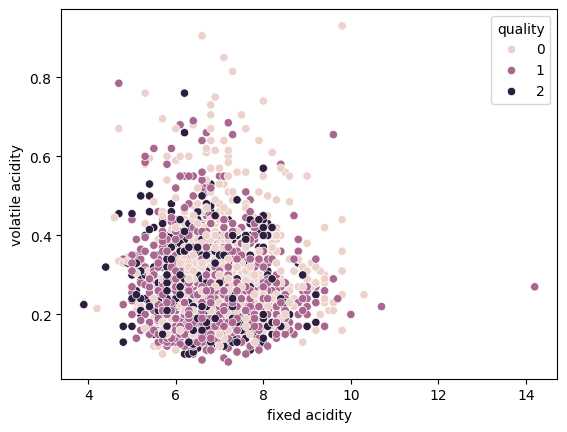

In [38]:
sns.scatterplot(data = X_train_df, x = "fixed acidity", y = "volatile acidity", hue = y_train_df)

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

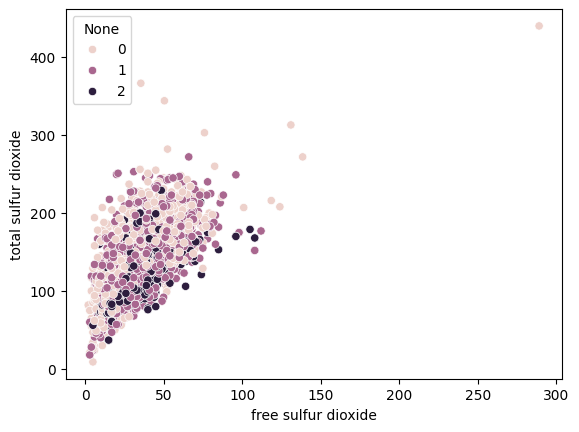

In [27]:
sns.scatterplot(data = X_train_df, x = "free sulfur dioxide", y = "total sulfur dioxide", hue = y_train_df)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

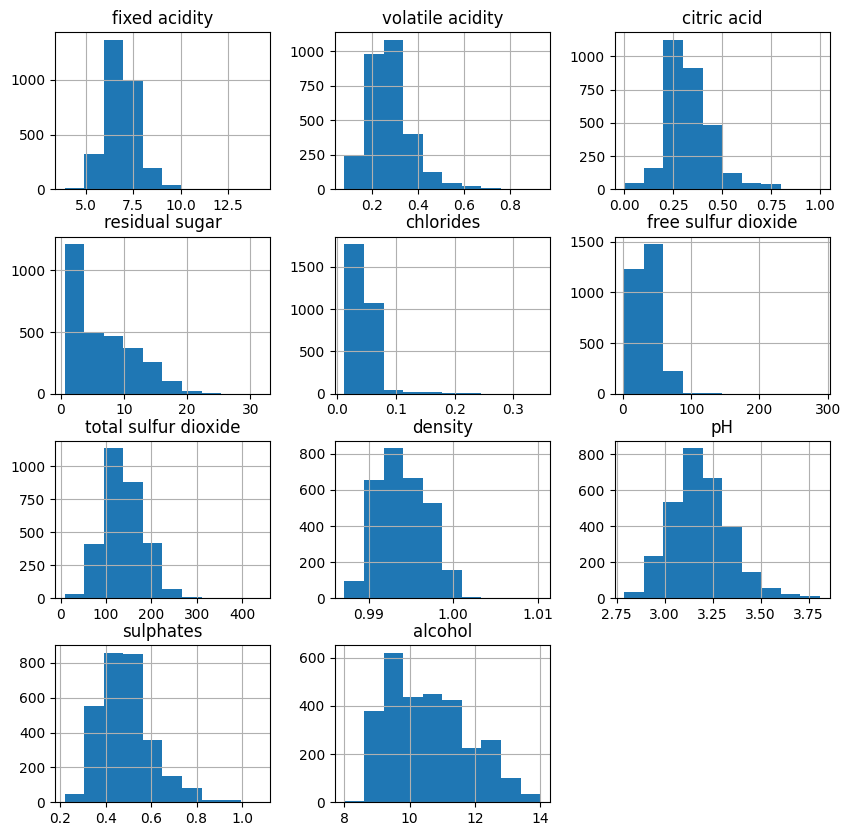

In [39]:
X_train_df.hist(figsize=(10,10))

In [31]:
X_train_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [40]:
train_df = pd.concat([X_train_df, y_train_df], axis = 1)

In [41]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,2
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,2
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,2
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,0
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,2


In [43]:
avg_qu = train_df.groupby("quality").mean()

In [ ]:
avg_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,6.954341,0.307652,0.334759,7.114697,0.052609,35.695607,149.593096,0.995202,3.170418,0.484278,9.832807
1,6.838969,0.261403,0.339174,6.405572,0.044703,35.708870,136.500379,0.993907,3.186240,0.490720,10.580023
2,6.747970,0.262759,0.330421,5.313759,0.038690,34.822556,126.705263,0.992494,3.208887,0.500361,11.375213


In [46]:
avg_qu.index

Index([0, 1, 2], dtype='int64', name='quality')

<Axes: xlabel='quality'>

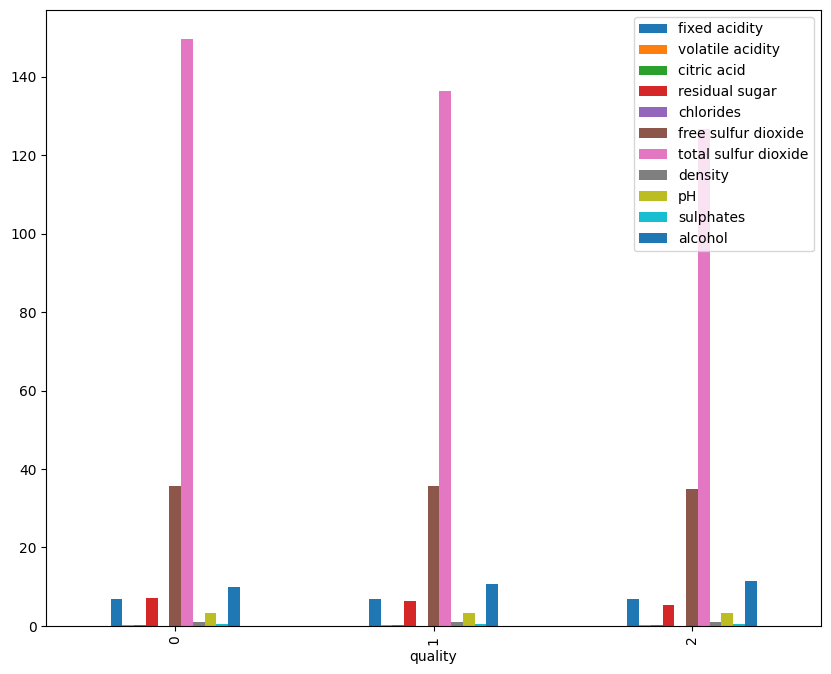

In [52]:
avg_qu.plot(kind = "bar", figsize=(10, 8))

cols = fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol

<Axes: xlabel='quality', ylabel='fixed acidity'>

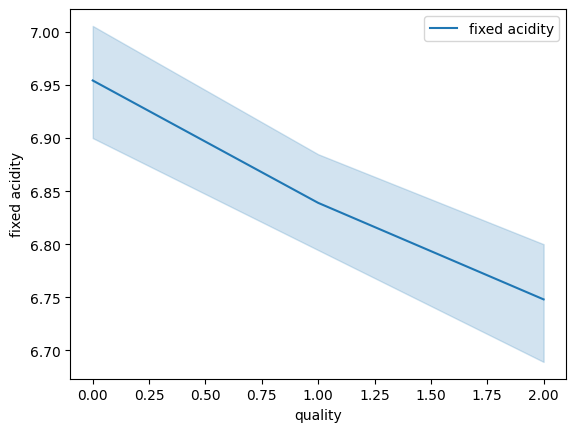

In [60]:
sns.lineplot(data = train_df, y = "fixed acidity", x = "quality", label = "fixed acidity")

<Axes: xlabel='quality', ylabel='volatile acidity'>

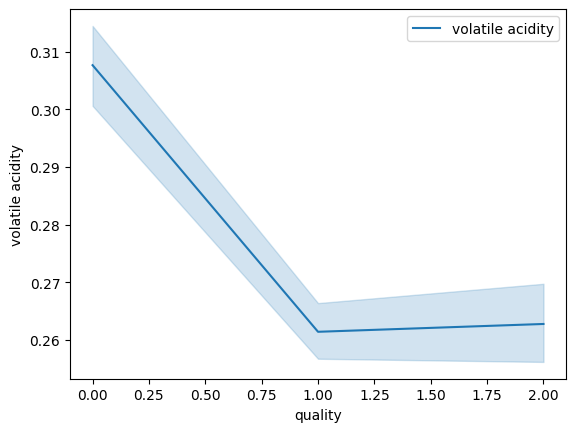

In [61]:
sns.lineplot(data = train_df, y = "volatile acidity", x = "quality", label = "volatile acidity")

<Axes: xlabel='quality', ylabel='citric acid'>

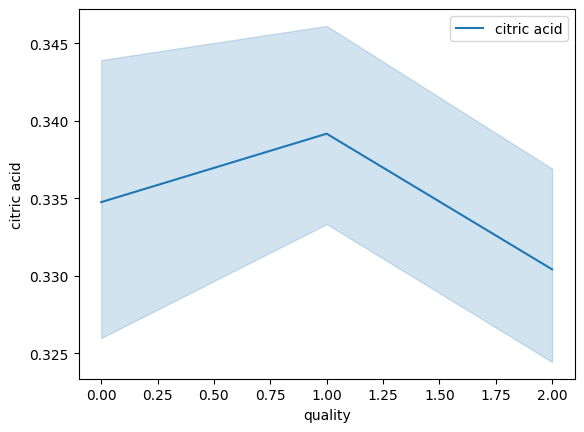

In [62]:
sns.lineplot(data = train_df, y = "citric acid", x = "quality", label = "citric acid")

<Axes: xlabel='quality', ylabel='residual sugar'>

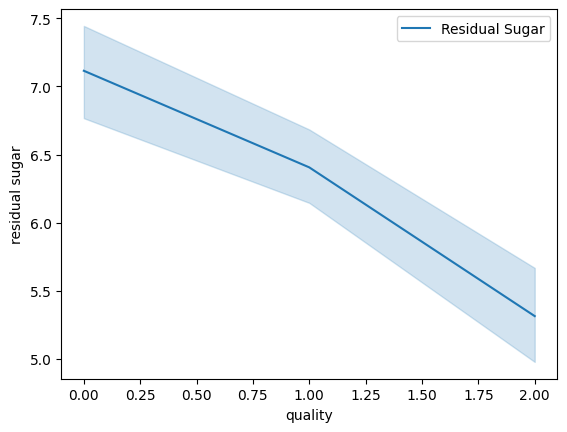

In [63]:
sns.lineplot(data = train_df, y = "residual sugar", x = "quality", label = "Residual Sugar")

<Axes: xlabel='quality', ylabel='chlorides'>

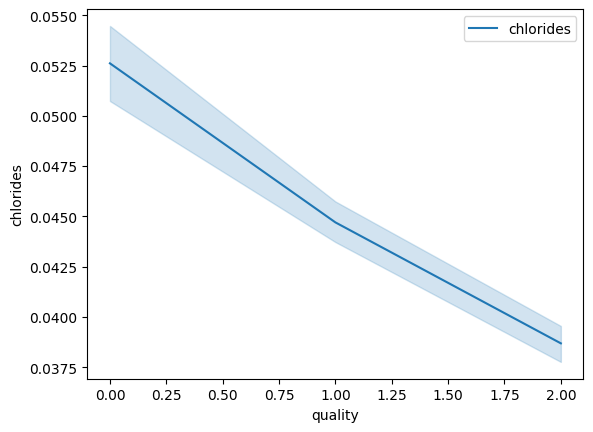

In [64]:
sns.lineplot(data = train_df, y = "chlorides", x = "quality", label = "chlorides")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

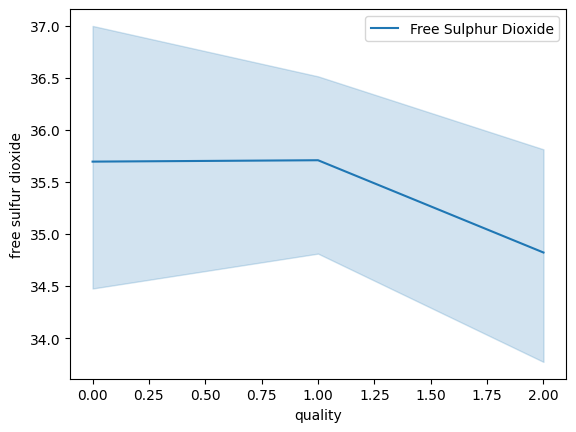

In [65]:
sns.lineplot(data = train_df, y = "free sulfur dioxide", x = "quality", label = "Free Sulphur Dioxide")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

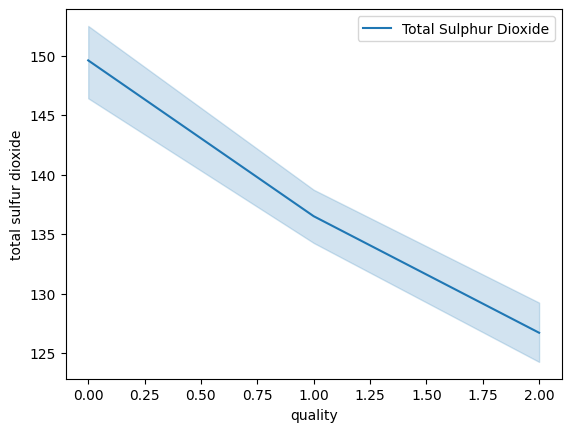

In [66]:
sns.lineplot(data = train_df, y = "total sulfur dioxide", x = "quality", label = "Total Sulphur Dioxide")

<Axes: xlabel='quality', ylabel='density'>

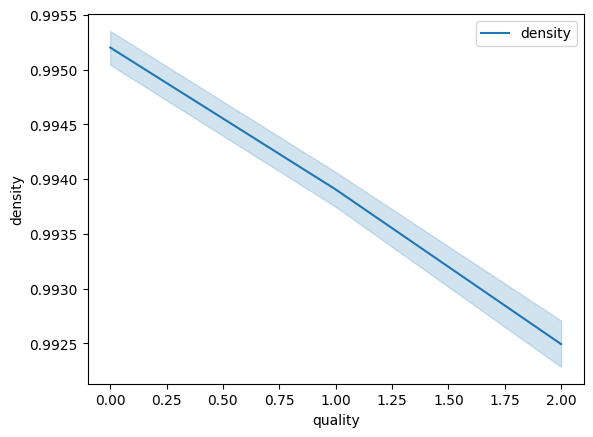

In [67]:
sns.lineplot(data = train_df, y = "density", x = "quality", label = "density")

<Axes: xlabel='quality', ylabel='pH'>

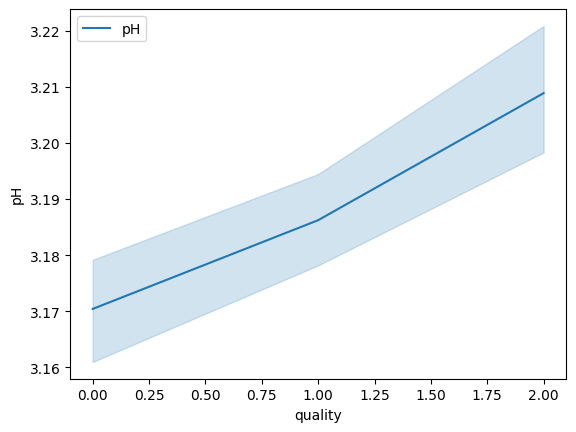

In [68]:
sns.lineplot(data = train_df, y = "pH", x = "quality", label = "pH")

<Axes: xlabel='quality', ylabel='sulphates'>

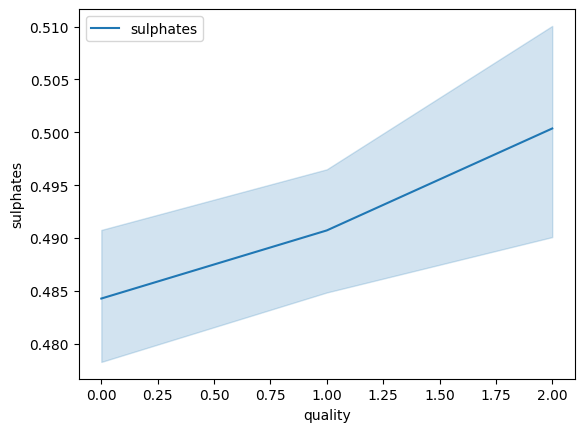

In [69]:
sns.lineplot(data = train_df, y = "sulphates", x = "quality", label = "sulphates")

<Axes: xlabel='quality', ylabel='alcohol'>

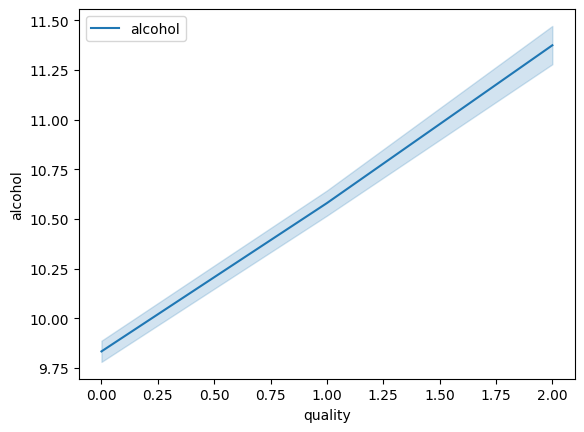

In [70]:
sns.lineplot(data = train_df, y = "alcohol", x = "quality", label = "alcohol")

In [71]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**EDA Observations:**
1. Columns having almost linear relation with quality category : 
- fixed acidity
- residual sugar
- chlorides
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality

2. Columns not that useful:
- volatile acidity
- citric acid
- free sulfur dioxide
